In [ ]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


# Exercise 4
## a) see pdf

## b)

| p 1-sided  | p 2-sided  | CL 1-sided | CL 2-sided | stdevs    |
| ---------- | ---------- | ---------  | ---------- | --------- |
| **0.0500** | **0.100**  | **95.0%**  | **90.0%**  |  **1.64** | 
|  0.0250    | **0.0500** | 97.5%      | 95.0%      |  1.96     |
| 0.100      | 0.200      | **90.0%**  | 80.0%      |  1.28     |
| 0.0250     | 0.050      | 97.5%      | **95.0%**  |  1.96     |
| 0.023      | 0.046      | 97.7%      | 95.4%      | **2.00**  |
| 0.002      | 0.004      | 99.8%      | 99.6%      | **3.00**  |
| 0.00       | 0.00       | 100.%      | 100.%      | **5.00**  |


## c)
You should consider the 1-sided approach to calculating p-values when looking at positive excess above the background because you are looking at *positive* excess. The other side of the p-value corresponds to a totally different kind of signal event, not the positive excess.


# Exercise 5


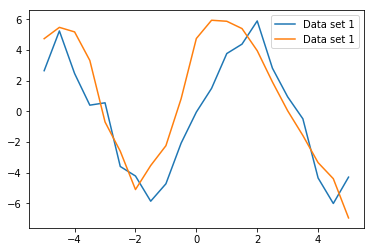

In [123]:
X_RANGE = np.arange(-5, 5.5, 0.5)
def f(x, a, b=0):
    return a * np.sin(x) + b * np.exp(-np.power(x, 2))

def get_measurements(a, b, xs=X_RANGE):
    return f(xs, a, b) + np.random.normal(0, 1, xs.size)
    
DATA_SET_1 = get_measurements(5, 0)
DATA_SET_2 = get_measurements(5, 5)

plt.plot(X_RANGE, DATA_SET_1, label="Data set 1")
plt.plot(X_RANGE, DATA_SET_2, label="Data set 1")
plt.legend()

## a) One-parameter model (B=0), A in [0, 10]

The different hypotheses are simply the value of $A$.
If we choose to consider $k$ values of $A$ (uniformly distributed between $0$ and $10$),
Then $P(A) = \frac{1}{k}$ for all $A$.

To figure out $P(D=\{f_{\text{data}}(x_i)\}|A)$, we first need to figure out the number of standard deviations associated with 
a given set of observations.

$$\sigma(f_{\text{data}}(x_i)|A) = |f_{\text{data}}(x_i) - f_{\text{model}}(x_i; A)|$$

The probability associated with the one $x$-value is simply the one-sided p-value associated to that standard deviation.

$$ P_i(f_{\text{data}}(x_i)|A) = \int_{\sigma(f_{\text{data}}(x_i)|A)}^{\infty} N(x; 0, 1) dx $$

So the likelihood for a set of observations $\{x_i\}$ is the product of these.

$$P(\{f_{\text{data}}(x_i)\}|A) = \prod_i P_i(f_{\text{data}}(x_i)|A)$$


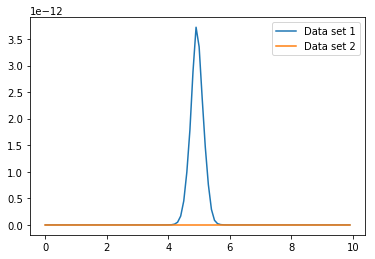

In [3]:
def get_likelihood_of_data_point(f_data_i, x_i, a, b=0):
    sigma = np.absolute(f_data_i - f(x_i, a, b))
    p_val = 1-st.norm.cdf(sigma)
    return p_val
    
def get_likelihood_of_data(data, a, b=0, xs=X_RANGE):
    partial_likelihoods = np.zeros(xs.size)

    for i, x_i in enumerate(xs):
        partial_likelihoods[i] = get_likelihood_of_data_point(data[i], x_i, a, b)
        
    likelihood = np.prod(partial_likelihoods)
    return likelihood

A_RANGE = np.arange(0, 10, 0.1)

def get_likelihoods_for_a_vals(data, a_vals=A_RANGE, xs=X_RANGE):
    likelihoods = np.zeros(a_vals.size)
    
    for i, a_i in enumerate(a_vals):
        likelihoods[i] = get_likelihood_of_data(data, a_i, 0, xs)
        
    return likelihoods

LIKELIHOODS_1 = get_likelihoods_for_a_vals(DATA_SET_1)
LIKELIHOODS_2 = get_likelihoods_for_a_vals(DATA_SET_2)

plt.plot(A_RANGE, LIKELIHOODS_1, label="Data set 1")
plt.plot(A_RANGE, LIKELIHOODS_2, label="Data set 2")
plt.legend()

Best guess for data set 1 is A=4.9 with posterior prob=0.201843154753
Best guess for data set 2 is A=5.1 with posterior prob=0.16305976276


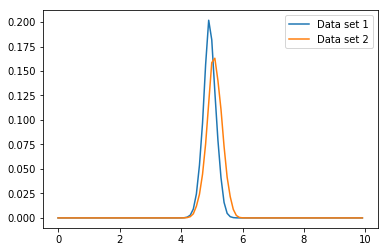

In [8]:
# I avoid dividing by the number of elements because this cancels out between numerator and denominator
def get_marginal_prob_from_likelihoods(likelihoods):
    return np.sum(likelihoods) 

def get_posterior_prob(likelihoods):
    return likelihoods / get_marginal_prob_from_likelihoods(likelihoods)

POSTERIOR_1 = get_posterior_prob(LIKELIHOODS_1)
POSTERIOR_2 = get_posterior_prob(LIKELIHOODS_2)

MAX_POSTERIOR_IDX_1 = np.argmax(POSTERIOR_1)
MAX_POSTERIOR_IDX_2 = np.argmax(POSTERIOR_2)

MAX_A_1 = A_RANGE[MAX_POSTERIOR_IDX_1]
MAX_A_2 = A_RANGE[MAX_POSTERIOR_IDX_2]

MAX_POSTERIOR_1 = POSTERIOR_1[MAX_POSTERIOR_IDX_1]
MAX_POSTERIOR_2 = POSTERIOR_2[MAX_POSTERIOR_IDX_2]

print("Best guess for data set 1 is A={} with posterior prob={}".format(MAX_A_1, MAX_POSTERIOR_1))
print("Best guess for data set 2 is A={} with posterior prob={}".format(MAX_A_2, MAX_POSTERIOR_2))

plt.plot(A_RANGE, POSTERIOR_1, label="Data set 1")
plt.plot(A_RANGE, POSTERIOR_2, label="Data set 2")
plt.legend()

## b) Two-parameter model A and B in [0, 10]
We can conduct the exact same procedure, now for two sets of parameters

In [13]:
B_RANGE = A_RANGE

def get_likelihoods_for_ab_vals(data, a_vals=A_RANGE, b_vals=B_RANGE, xs=X_RANGE):
    likelihoods = np.zeros((b_vals.size, a_vals.size))
    
    # 100 * 100 * 26 ops = 26000
    for i, a_i in enumerate(a_vals):
        for j, b_j in enumerate(b_vals):
            likelihoods[j, i] = get_likelihood_of_data(data, a_i, b_j, xs)
        
    return likelihoods

LIKELIHOODS_AB_1 = get_likelihoods_for_ab_vals(DATA_SET_1)
LIKELIHOODS_AB_2 = get_likelihoods_for_ab_vals(DATA_SET_2)

POSTERIOR_AB_1 = get_posterior_prob(LIKELIHOODS_AB_1)
POSTERIOR_AB_2 = get_posterior_prob(LIKELIHOODS_AB_2)

MAX_POSTERIOR_AB_Y_1, MAX_POSTERIOR_AB_X_1 = np.unravel_index(np.argmax(POSTERIOR_AB_1), POSTERIOR_AB_1.shape)
MAX_POSTERIOR_AB_Y_2, MAX_POSTERIOR_AB_X_2 = np.unravel_index(np.argmax(POSTERIOR_AB_2), POSTERIOR_AB_2.shape)

MAX_AB_A_1 = A_RANGE[MAX_POSTERIOR_AB_X_1]
MAX_AB_B_1 = B_RANGE[MAX_POSTERIOR_AB_Y_1]
MAX_AB_A_2 = A_RANGE[MAX_POSTERIOR_AB_X_2]
MAX_AB_B_2 = B_RANGE[MAX_POSTERIOR_AB_Y_2]

MAX_POSTERIOR_AB_1 = POSTERIOR_AB_1[MAX_POSTERIOR_AB_Y_1, MAX_POSTERIOR_AB_X_1]
MAX_POSTERIOR_AB_2 = POSTERIOR_AB_2[MAX_POSTERIOR_AB_Y_2, MAX_POSTERIOR_AB_X_2]

AB_X, AB_Y = np.meshgrid(A_RANGE, B_RANGE)

print("Best guess for data set 1 is A={}, B={} with posterior prob={}".format(MAX_AB_A_1, MAX_AB_B_1, MAX_POSTERIOR_AB_1))
print("Best guess for data set 2 is A={}, B={} with posterior prob={}".format(MAX_AB_A_2, MAX_AB_B_2, MAX_POSTERIOR_AB_2))

Best guess for data set 1 is A=4.9, B=0.0 with posterior prob=0.054499917642
Best guess for data set 2 is A=5.0, B=4.9 with posterior prob=0.0129289960854


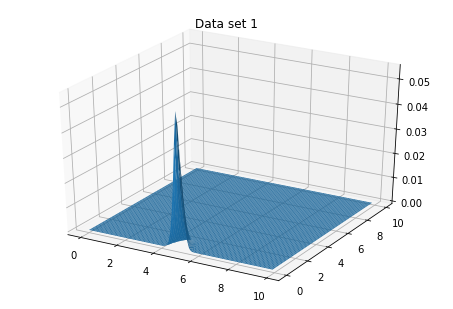

In [14]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_surface(AB_X, AB_Y, POSTERIOR_AB_1, rstride=1, cstride=1)
ax1.set_title("Data set 1")
plt.show()

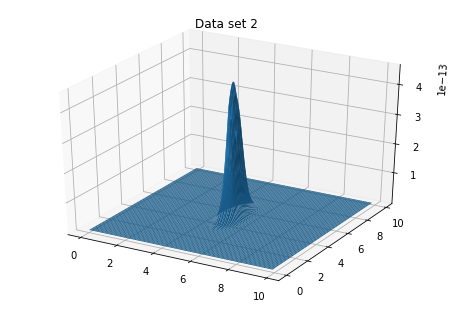

In [15]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_surface(AB_X, AB_Y, LIKELIHOODS_AB_2, rstride=1, cstride=1)
ax2.set_title("Data set 2")
plt.show()

## c) Occam's razor. 

As we see, the two models come to the same conclusion for dataset 1, but the 2-parameter model has a lower probability for this ultimate conclusion (20.% versus 5.4%). This is because when we introduce the second parameter, we evaluate this over a region [0,10]. The peak height in this new parameter space is suppressed by the factor that is proportional to the peak width divided by the total width of the region considered. When the peak width is much smaller than this total width (as is the case here), the calculated posterior is similarly decreased. We could recover a higher probability by shrinking the region in parameter space we consider for B.

## d) Conclusions via Jeffrey's scale
$$ k =\frac{P_{\text{1 param}}(D | A=5.0, B=4.9)}{P_{\text{2 param}}(D | A=5.1, B=0.0)}$$
Where we consider the maximum value of the likelihood for either distribution.


In [18]:
K = LIKELIHOODS_AB_2[MAX_POSTERIOR_AB_Y_2, MAX_POSTERIOR_AB_X_2] / LIKELIHOODS_2[MAX_POSTERIOR_IDX_2]
print("K = {}".format(K))

K = 5.20861433757e+15


This is decisively in favor of 2-parameter model.

# Exercise 6
## a)

Inverse transform estimated expectation of <x^2>: 1.03897224822


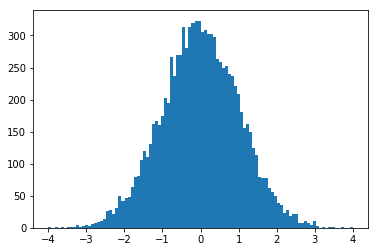

In [120]:
def gen_inverse_transform_samples(n_samples=10000):
    samples = np.zeros(n_samples)

    for i in range(n_samples):
        samples[i] = st.norm.ppf(np.random.uniform()) # inverse cdf of standard normal distribution
        
    return samples

INVERSE_TRANSFORM_SAMPLES = gen_inverse_transform_samples()
        
plt.hist(INVERSE_TRANSFORM_SAMPLES, bins=100)

print("Inverse transform estimated expectation of <x^2>: {}".format(np.mean(np.power(INVERSE_TRANSFORM_SAMPLES, 2))))

## b)

Rejection sampling estimated expectation of <x^2>: 1.08930957011


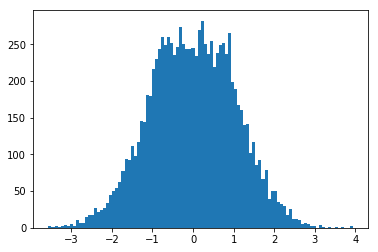

In [119]:
def gen_rejection_sampling_samples(x_bounds=[-4, 4], w_bounds=[0, 0.3], n_samples=10000):
    samples = np.zeros(n_samples)
    i = 0
    
    pdf = lambda x: st.norm.pdf(x)
    
    while i < n_samples:
        w = np.random.uniform(*w_bounds)
        x = np.random.uniform(*x_bounds)
        p = pdf(x)
        
        if w < p:
            samples[i] = x
            i += 1
            
    return samples

REJECTION_SAMPLING_SAMPLES = gen_rejection_sampling_samples()

plt.hist(REJECTION_SAMPLING_SAMPLES, bins=100)
print("Rejection sampling estimated expectation of <x^2>: {}".format(np.mean(np.power(REJECTION_SAMPLING_SAMPLES, 2))))

# Exercise 7
## a)

In [145]:
def get_density(sample):
    return np.exp(-0.5 * (np.power(sample[0], 2) 
                          + np.power(sample[1], 2) 
                          + np.power(sample[2], 2)) 
                  -0.4 * (sample[0] * sample[1] - sample[0] * sample[2]))

def mcmc(n_samples=10000, n_steps_bw_samples=5):
    n_steps = (n_samples+1)*n_steps_bw_samples
    
    samples = np.zeros((n_steps, 3))
    samples[0] = st.multivariate_normal.rvs(np.zeros(3))
    
    for i in range(1, n_steps):
        # Proposal is multivariate gaussian centered around previous sample
        proposal = st.multivariate_normal.rvs(np.zeros(3)) 
        
        density_ratio = get_density(proposal)/get_density(samples[i-1])
        if density_ratio > 1 or np.random.uniform > density_ratio:
            samples[i] = proposal
        else:
            samples[i] = samples[i-1]
        
    return samples[n_steps_bw_samples::n_steps_bw_samples]

MCMC_SAMPLES = mcmc()
print("Finished generating samples {}".format(MCMC_SAMPLES.shape))


Finished generating samples (10000, 3)


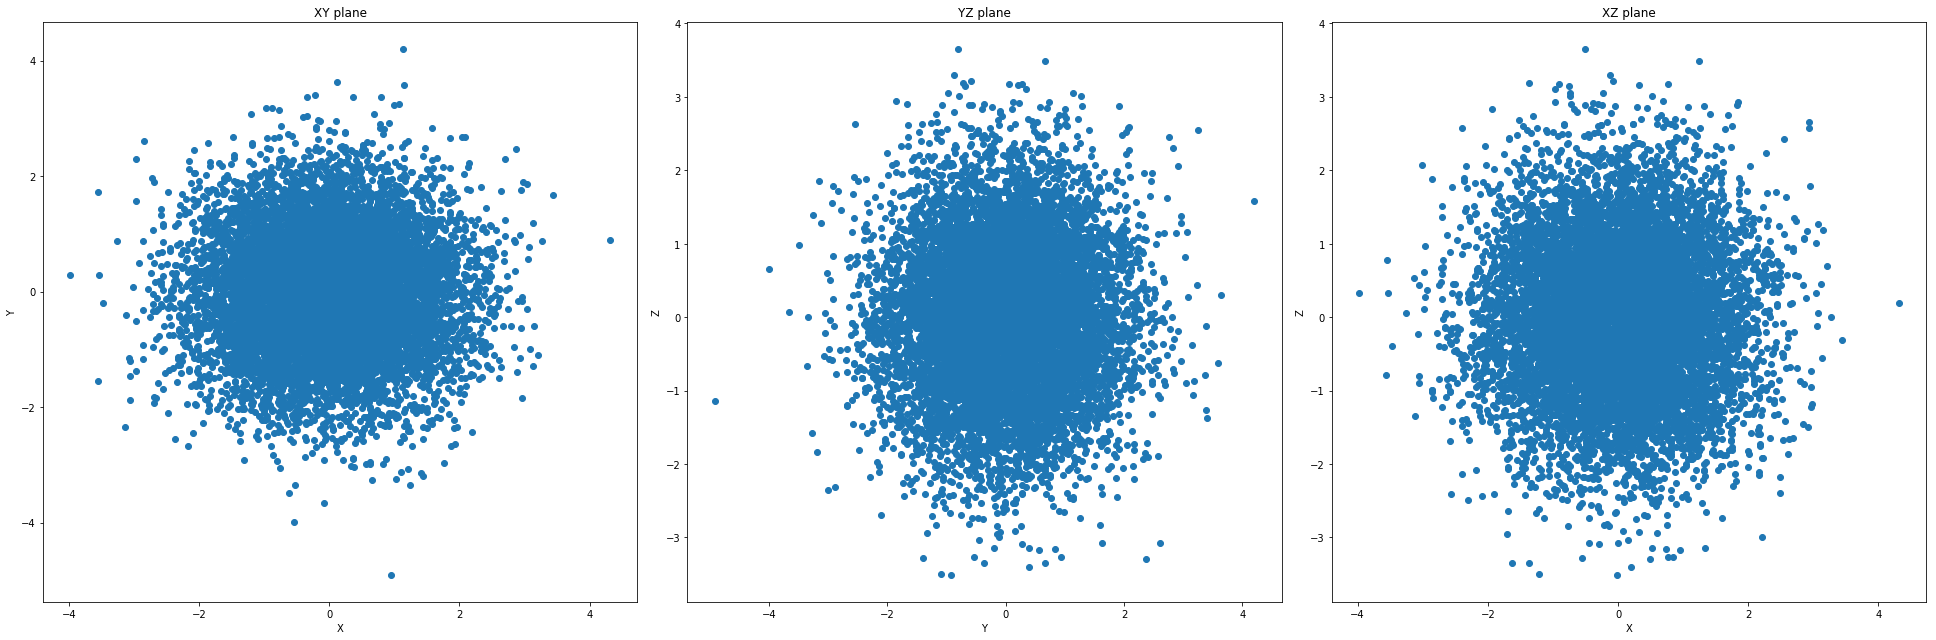

In [146]:
MCMC_X = MCMC_SAMPLES[:, 0]
MCMC_Y = MCMC_SAMPLES[:, 1]
MCMC_Z = MCMC_SAMPLES[:, 2]

fig, (ax_XY, ax_YZ, ax_XZ) = plt.subplots(1,3, figsize=(27,9))
ax_XY.scatter(MCMC_X, MCMC_Y)
ax_XY.set(xlabel='X', ylabel='Y', title="XY plane")
ax_YZ.scatter(MCMC_Y, MCMC_Z)
ax_YZ.set(xlabel='Y', ylabel='Z', title="YZ plane")
ax_XZ.scatter(MCMC_X, MCMC_Z)
ax_XZ.set(xlabel='X', ylabel='Z', title="XZ plane")
plt.tight_layout()

This is what we expected, because we have that the density function exponential is (having multiplied out by a factor $-1/2$):

$$x^2+y^2+z^2+ \frac{4}{5}xy- \frac{4}{5}xz$$

The more probable states are those that maximize this. It will be approximately gaussian but with some covariance because of the cross terms. This will slightly deform the spheroid and bulge out where the product xy is positive and bulge in when the product xz is negative. This is visually confirmed.


## b)

In [62]:
MCMC_X_MEAN = np.mean(MCMC_X)
MCMC_Y_MEAN = np.mean(MCMC_Y)
MCMC_Z_MEAN = np.mean(MCMC_Z)

print("The means are ({}, {}, {})".format(MCMC_X_MEAN, MCMC_Y_MEAN, MCMC_Z_MEAN))

The means are (-0.0103428062168, 0.0151561248779, -0.00464443492097)


Noticing that the distributions are (at least visually) symmetrical about $(x, y, z) = (0, 0, 0)$, we assume our credible interval is determined by some unique value $(\sigma_x, \sigma_y, \sigma_z)$:

$$\int_{x=-\sigma_x}^{\sigma_x}\int_{z,y=-\infty}^{\infty}dx dy dz P(x, y, z) = 0.684$$

And similarly for x and y. As we expect for symmetrical distributions, the left and right bounds are the same.

In [109]:
def get_centered_bounds(data, step=0.01):
    contained_proportion = 0
    bound = 0
    
    while contained_proportion < 0.684:
        bound += step
        contained_proportion = np.true_divide(np.sum(np.where(np.logical_and(np.greater(data, -bound), np.less(data, bound)), 1, 0)),data.shape[0])
        
    return (-bound, bound)

MCMC_X_BOUNDS = get_centered_bounds(MCMC_X)
MCMC_Y_BOUNDS = get_centered_bounds(MCMC_Y)
MCMC_Z_BOUNDS = get_centered_bounds(MCMC_Z)

print("Bounds are: \nX {} \nY {} \nZ {}".format(MCMC_X_BOUNDS, MCMC_Y_BOUNDS, MCMC_Z_BOUNDS))

Bounds are: 
X (-0.6000000000000003, 0.6000000000000003) 
Y (-0.6000000000000003, 0.6000000000000003) 
Z (-0.5800000000000003, 0.5800000000000003)
